In [67]:
import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt
import seaborn as sns

from state import State
from copy import deepcopy

In [92]:
cc_paper = {0: "tail", 1:"pattern", 2:"head", 3:"antenna", 4:"feet", 5:"legs"}

In [73]:
def plot_state(state):
    fig, axs = plt.subplots(1, len(state.views))
    
    for i, view in enumerate(state.views):
        dim_indeces = view.get_dim_indeces()

        subset = state.data[:, dim_indeces]
        to_graph = np.zeros_like(subset)
        
        # construct matrix for the view
        cur = 0
        row_order = []
        dividing_lines = []
        for cluster in view.elements:
            to_graph[range(cur, cur + len(cluster)), :] = subset[list(cluster)]
            cur += len(cluster)
            row_order += list(cluster)
            dividing_lines.append(cur - .5)
        
        if len(state.views) == 1:
            ax = plt.subplot()
            
            for line in dividing_lines:
                ax.axhline(y = line, color = 'r', linestyle = '-')

            ax.xaxis.set_ticks(range(len(dim_indeces)))
            ax.set_xticklabels(dim_indeces)
            ax.yaxis.set_ticks(range(state.n_obs))
            ax.set_yticklabels(row_order)

            ax.matshow(to_graph)
        
        else:
            for line in dividing_lines:
                axs[i].axhline(y = line, color = 'r', linestyle = '-')
                
            axs[i].xaxis.set_ticks(range(len(dim_indeces)))
            axs[i].set_xticklabels(dim_indeces)

            axs[i].yaxis.set_ticks(range(state.n_obs))
            axs[i].set_yticklabels(row_order)

            axs[i].matshow(to_graph)

In [3]:
# Fig 4, example (a) from crosscat 2011
data = np.array(
    [
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 0, 1],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 0],
    ]
)

n_obs, n_dims = data.shape

In [ ]:
default_rng().gamma(1, 1)

In [98]:
my_state = State(data, alpha=1)
my_state.calc_log_lik_model()

-103.97528350151946

In [ ]:
states = []
liks = []
states.append(deepcopy(my_state))
liks.append(my_state.calc_log_lik_model())

In [116]:
for i in range(40):
    print(f"iter {i}")
    my_state.transition(5)
    states.append(deepcopy(my_state))
    liks.append(my_state.calc_log_lik_model())

iter 0
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 1
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 2
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 3
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 4
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 5
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 6
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 7
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 8
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 9
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 10
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 11
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 12
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 13
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 14
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 15
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 16
sweep 1/5
sweep 2/5
sweep 3/5
sweep 4/5
sweep 5/5
iter 17
sweep 1/5
sweep 

<AxesSubplot: ylabel='Count'>

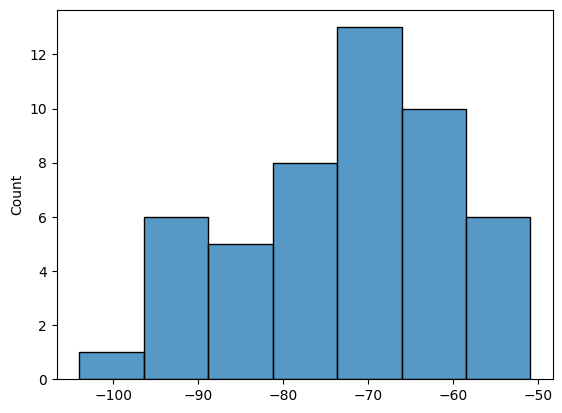

In [117]:
sns.histplot(liks)

In [121]:
len(liks)

101

-50.86441494518425
10


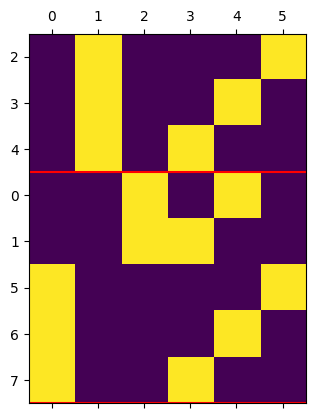

In [118]:
best = np.argmax(liks)
plot_state(states[best])
print(liks[best])
print(best)

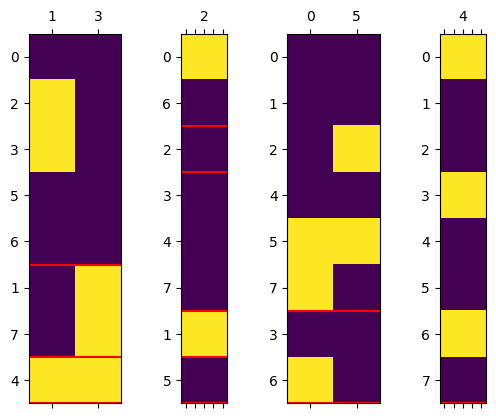

In [119]:
plot_state(my_state) 

In [91]:
for dim in my_state.views[2].dims:
    print(f"Dim {dim.index}: {dim.params}, {dim.hypers}")

Dim 5: [0.22897673516531825, 0.7332660242914494], {'s': 1.7243497742588065, 'b': 0.5785793245914403}


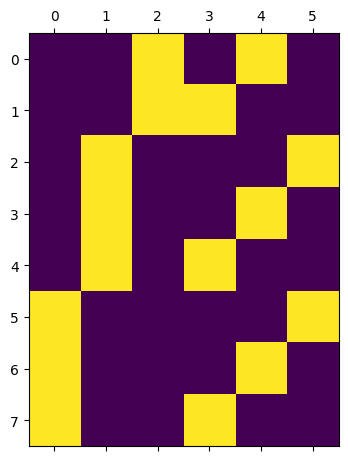

In [98]:
plt.matshow(data)

<AxesSubplot: >

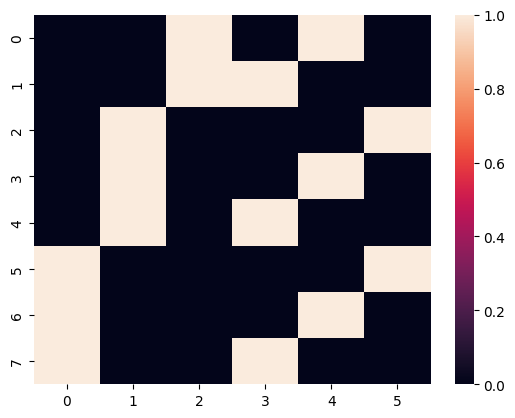

In [ ]:
sns.heatmap(data)

In [ ]:
# data = np.ones((1000, 2))
# data = np.concatenate((data, np.zeros((2000, 2))))
# n_obs, n_dims = data.shape